In [26]:
# imports
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats


In [27]:
# Get the stock data for the given ticker
ticker = "AAPL"
data = yf.Ticker(ticker).history(period="5y")

In [28]:
# Calculate the mean and median of the stock prices
mean = data['Close'].mean()
median = data['Close'].median()

# Print key results
print(f'Mean: {mean}')
print(f'Median: {median}')

Mean: 96.5347627665525
Median: 89.63121795654297


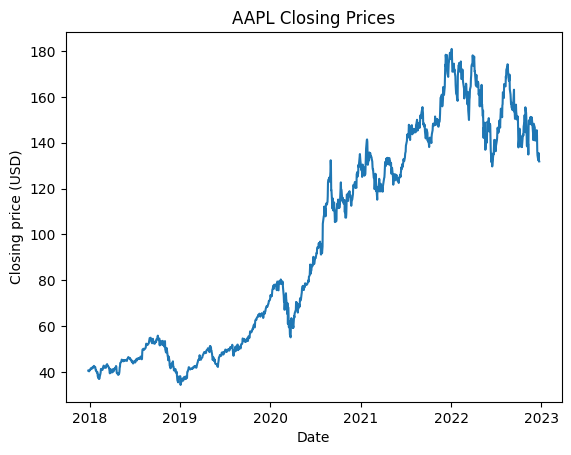

In [29]:
# Plot the closing price against time
plt.plot(data['Close'])
plt.xlabel('Date')
plt.ylabel('Closing price (USD)')
plt.title(f'{ticker} Closing Prices')
plt.show()

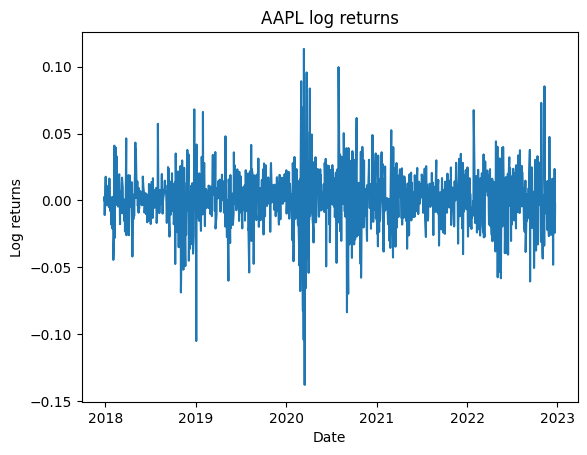

In [30]:
# calculate log normal return
data["log_return"] = np.log(data["Close"]).diff()

# plot log return
plt.plot(data["log_return"])
plt.xlabel("Date")
plt.ylabel("Log returns")
plt.title("{} log returns".format(ticker))
plt.show()

Data is likely normal (p=1.000)


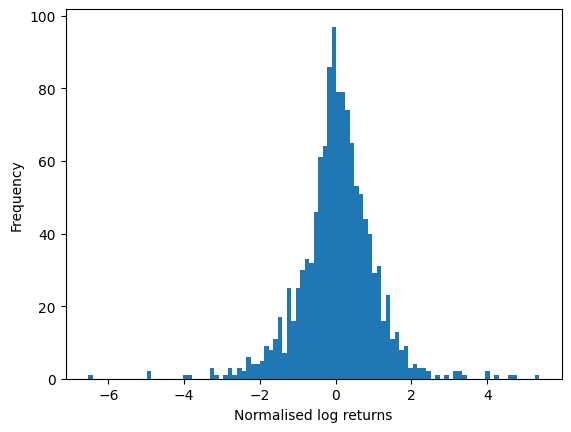

In [33]:
# calculate normalised log return
data["log_norm_returns"] = data["log_return"]/data["log_return"].std()

def normality_test(data):
    """Test a data set for normality

    Args:
        data (np.array): Array of stock data
    """

    # Perform the Shapiro-Wilk test
    stat, p = stats.shapiro(data)

    # Test the null hypothesis that the data is normal
    alpha = 0.05
    if p > alpha:
        print(f'Data is likely normal (p={p:.3f})')
    else:
        print(f'Data is likely not normal (p={p:.3f})')

# test for normality
normality_test(data["log_return"])
    
# plot accompyanying histogram
plt.hist(data["log_norm_returns"], bins = 100)
plt.ylabel("Frequency")
plt.xlabel("Normalised log returns")
plt.show()